# matplotlib

グラフなどの可視化に用いる最も一般的なPythonのライブラリです。

In [ ]:
import pandas as pd
import random
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


## 基本的な図の作り方

線グラフを描いてみます。

In [ ]:

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
yen = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, yen, color = 'green', marker = 'o', linestyle = 'solid')
plt.title('Random price plot')
plt.xlabel('year')
plt.ylabel('yen')
plt.show()

`pandas`のデータフレームを用いて棒グラフをつくります。

In [ ]:
fruit = pd.DataFrame({'category': ['banana','orange','apple','apple','orange','orange','apple','apple','apple','banana'],
                      "num_sell" : [100, 40, 30, 30, 40, 100, np.nan, 40, 1, 6],
                      "price" : [100, 130, 80, 150, 70, 75, np.nan, 90, 190, 110],})
fruit

In [ ]:
fruit_size = fruit.groupby(['category']).sum()
fruit_size

In [ ]:
plt.bar(fruit_size.index, fruit_size.num_sell, color = ['yellow','red','orange'], alpha =0.7)
plt.ylabel('# of sold food')
plt.title('Fruit')
# plt.savefig('fig_soldfruit.jpg') # この１行を実行するとカレントディレクトリにプロットした画像を保存することができます。
plt.show()

## 文字をプロットする

In [ ]:
# プロットで使うデータをダミーとして作ります

text = ['data','python','analysis', 'science', 
        'statistics', 'dynamic','r', 'machine learning', 'deep learning', 'insights']
freq = [100, 40, 80, 21, 10, 3, 45, 79, 81, 3]
importance = [200, 180, 190, 50, 150, 30, 20, 40, 20, 90]

text_df = pd.DataFrame({'text':text, 'freq': freq, 'importance': importance})
text_df

,text,freq,importance
0,data,100,200
1,python,40,180
2,analysis,80,190
3,science,21,50
4,statistics,10,150
5,dynamic,3,30
6,r,45,20
7,machine learning,79,40
8,deep learning,81,20
9,insights,3,90


`plt.text`を用いて文字をプロットしてみましょう


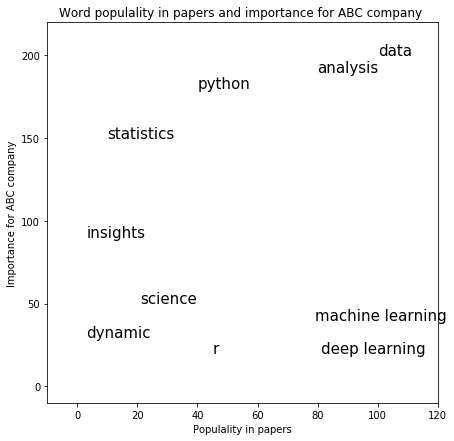

In [ ]:
plt.figure(figsize=(7, 7))
for i in range(len(text_df)):
    plt.text(text_df.loc[i, 'freq'], text_df.loc[i, 'importance'], 
             text_df.loc[i, 'text'], fontsize=15)
    
plt.xlabel("Populality in papers")
plt.ylabel('Importance for ABC company')
plt.axis([-10, 120, -10, 220])
plt.title('Word populality in papers and importance for ABC company ')
plt.show()

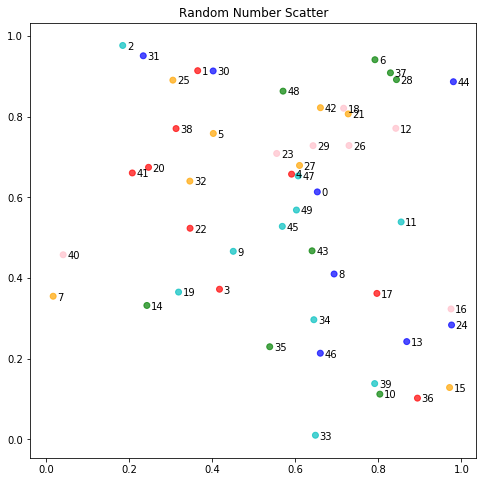

In [ ]:
plt.figure(figsize=[8,8])
num_a = [random.random() for x in range(50)]
num_b = [random.random() for x in range(50)]


colors = ['pink','red','blue','green','orange','c']

plt.scatter(num_a, num_b, color = [colors[random.randint(0, 5)] for x in range(50)], alpha = 0.7)

for label, a_count, b_count in zip(list(range(50)), num_a, num_b):
    plt.annotate(label, xy = (a_count, b_count), xytext = (a_count+0.01, b_count-0.01), fontsize = 10)

plt.title('Random Number Scatter')
plt.show()

<a id = 'multiplot'></a>
    
## 複数図表のプロット

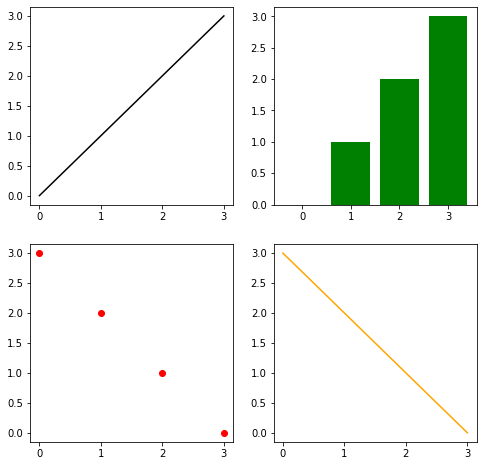

In [ ]:
# figureオブジェクトをまず生成します。figsizeで大きさを変更できます。
fig = plt.figure(figsize=(8,8))
# add_subplotでサブプロットを追加します。(2,2,1)はレイアウトを2x2にして4つのうちの1番目のサブプロットを選択しています。
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.plot([0,1,2,3],[0,1,2,3], '-', color='k')
ax2.bar([0,1,2,3],[0,1,2,3], color= 'green')
ax3.plot([0,1,2,3][::-1],[0,1,2,3], 'o', color= 'r')
ax4.plot([0,1,2,3][::-1],[0,1,2,3], color='orange')
plt.show()

これでからのサブプロット4つができました。

同様のことは、pltsubplotsメソッドを使ってもできます。

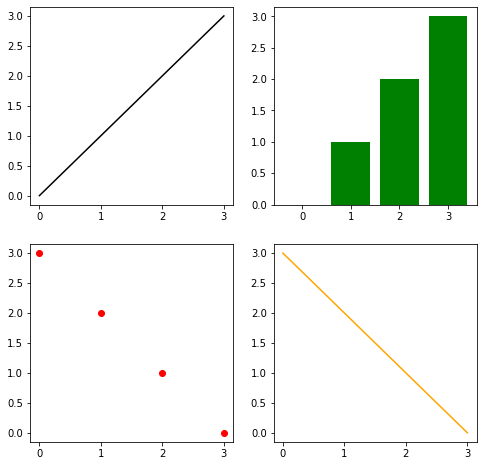

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
# axesは二次元配列のようなインデックスつけることが出来ます。
axes[0,0].plot([0,1,2,3],[0,1,2,3], '-', color='k') 
axes[0,1].bar([0,1,2,3],[0,1,2,3], color= 'green')
axes[1,0].plot([0,1,2,3][::-1],[0,1,2,3], 'o', color= 'r')
axes[1,1].plot([0,1,2,3][::-1],[0,1,2,3], color='orange')
plt.show()

````{note}
2次元に配置された複数のsubplotsは`flatten()`を使うことで、１次元としてアクセスすることができるようになります。
````

In [ ]:
fig, axs = plt.subplots(2, 2)
axs = axs.flatten()
i=1
for ax in axs:
    ax.plot(i, 1, 'o', color = 'red')
    i += 1
    ax.set_xlim(0,len(axs)+1)
plt.tight_layout()
plt.show()

```{note}
参考：他にも用途に応じて可視化で便利なライブラリーがあります
- [Bokeh](https://bokeh.pydata.org/en/latest/) 　matplotlibをベースにインターラクティブなデータ可視化などを可能にするライブラリ
- [seaborn](http://seaborn.pydata.org) 　matplotlibをベースに構築された見栄えの良い可視化などを可能にするライブラリ
```